In [1]:

import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
DATASET="D:/Jain University Project/Mini project/Data collection/tomato/5k/train_1"
DATASET2="D:/Jain University Project/Mini project/Data collection/tomato/5k/test_1"


In [3]:
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

In [4]:
        
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)   #index of catagory is given 
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])
        

In [5]:
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            test_data.append([img,label])

In [6]:
print(len(train_data))
print(len(test_data))


5200
840


In [7]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [8]:

for lbl in train_data[:10]:
    print(lbl[1])

0
4
6
6
2
0
1
6
1
7


In [9]:
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [10]:
y_train[2]

6

In [11]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train),len(y_train)


(5200, 5200)

In [12]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [13]:
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test),len(y_test)

(840, 840)

In [14]:
#reshaping the pixelvalue 
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(5200, 64, 64, 3)

In [15]:
X_train[1]


array([[[0.59607843, 0.54117647, 0.54117647],
        [0.59607843, 0.54117647, 0.54117647],
        [0.60392157, 0.54901961, 0.54901961],
        ...,
        [0.59215686, 0.54509804, 0.55294118],
        [0.60784314, 0.56078431, 0.56862745],
        [0.60784314, 0.56078431, 0.56862745]],

       [[0.56078431, 0.50588235, 0.50588235],
        [0.56862745, 0.51372549, 0.51372549],
        [0.57647059, 0.52156863, 0.52156863],
        ...,
        [0.62352941, 0.57647059, 0.58431373],
        [0.56470588, 0.51764706, 0.5254902 ],
        [0.59215686, 0.54509804, 0.55294118]],

       [[0.59607843, 0.54117647, 0.54117647],
        [0.59215686, 0.5372549 , 0.5372549 ],
        [0.60784314, 0.55294118, 0.55294118],
        ...,
        [0.63921569, 0.59215686, 0.6       ],
        [0.59607843, 0.54901961, 0.55686275],
        [0.59607843, 0.54901961, 0.55686275]],

       ...,

       [[0.62745098, 0.58039216, 0.58823529],
        [0.58823529, 0.54117647, 0.54901961],
        [0.62745098, 0

In [16]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(840, 64, 64, 3)

In [17]:
order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']


C:\Users\Jagga\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Image Count')

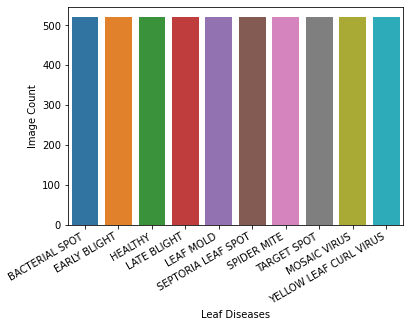

In [18]:
ax=sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_ylabel("Image Count")


C:\Users\Jagga\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Image Count')

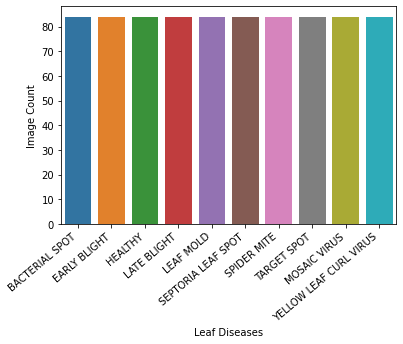

In [19]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

In [20]:

from keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [22]:
classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [23]:
hist=classifier.fit(X_train,one_hot_train,epochs=50,batch_size=150,validation_split=0.2)

Epoch 1/50
28/28 [==============================] - 14s 491ms/step - loss: 2.3003 - accuracy: 0.1084 - val_loss: 2.2898 - val_accuracy: 0.1423
Epoch 2/50
28/28 [==============================] - 14s 487ms/step - loss: 2.1623 - accuracy: 0.2041 - val_loss: 1.9883 - val_accuracy: 0.2923
Epoch 3/50
28/28 [==============================] - 13s 480ms/step - loss: 1.8354 - accuracy: 0.3356 - val_loss: 1.7035 - val_accuracy: 0.4029
Epoch 4/50
28/28 [==============================] - 13s 479ms/step - loss: 1.5426 - accuracy: 0.4632 - val_loss: 1.3527 - val_accuracy: 0.5538
Epoch 5/50
28/28 [==============================] - 14s 506ms/step - loss: 1.2829 - accuracy: 0.5587 - val_loss: 1.2550 - val_accuracy: 0.5683
Epoch 6/50
28/28 [==============================] - 14s 501ms/step - loss: 1.0954 - accuracy: 0.6161 - val_loss: 0.9902 - val_accuracy: 0.6683
Epoch 7/50
28/28 [==============================] - 16s 557ms/step - loss: 0.9587 - accuracy: 0.6538 - val_loss: 1.0494 - val_accuracy: 0.6317

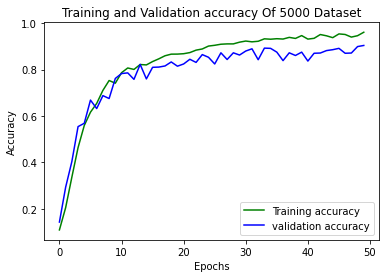

In [24]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
plt.plot( loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy Of 5000 Dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

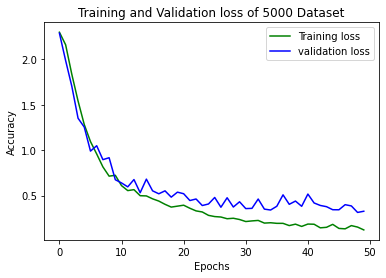

In [25]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
plt.plot( loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss of 5000 Dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

27/27 [==============================] - 0s 16ms/step - loss: 0.3574 - accuracy: 0.9000


(0.35736802220344543, 0.8999999761581421)

In [27]:
y_pred=classifier.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 5, 3, 2, 0, 0, 3, 3, 2, 8, 6, 0, 8, 0, 0, 8, 2, 1, 4, 9, 4, 6,
       4, 6, 4, 7, 8, 3, 5, 7, 2, 3, 1, 2, 6, 2, 8, 4, 2, 7, 6, 2, 8, 6,
       1, 5, 5, 4, 8, 5, 1, 2, 6, 0, 5, 9, 7, 7, 6, 1, 0, 3, 4, 1, 6, 7,
       4, 5, 6, 6, 4, 8, 2, 4, 2, 1, 8, 2, 7, 9, 4, 3, 3, 5, 8, 1, 7, 4,
       6, 3, 9, 4, 3, 3, 8, 7, 1, 3, 8, 6, 4, 5, 7, 1, 9, 5, 9, 4, 5, 2,
       8, 9, 7, 6, 2, 4, 2, 5, 0, 7, 1, 9, 9, 3, 4, 9, 3, 9, 5, 9, 6, 7,
       5, 8, 1, 3, 9, 5, 3, 7, 5, 9, 0, 2, 4, 1, 8, 1, 5, 2, 8, 7, 0, 9,
       7, 5, 4, 1, 7, 0, 0, 7, 0, 3, 7, 3, 1, 5, 0, 0, 2, 4, 4, 0, 1, 1,
       7, 4, 7, 7, 8, 7, 5, 0, 3, 0, 5, 8, 9, 9, 6, 9, 3, 6, 0, 5, 2, 8,
       9, 8, 6, 7, 1, 1, 9, 0, 9, 4, 8, 2, 2, 8, 6, 7, 0, 6, 5, 5, 8, 5,
       0, 5, 3, 9, 0, 2, 9, 1, 4, 4, 9, 4, 5, 9, 9, 5, 4, 4, 2, 5, 5, 3,
       6, 6, 0, 4, 3, 5, 7, 5, 3, 9, 4, 0, 2, 3, 3, 9, 5, 7, 7, 2, 8, 9,
       0, 5, 2, 7, 3, 1, 1, 4, 5, 0, 9, 6, 0, 5, 1, 9, 6, 3, 5, 9, 1, 1,
       0, 3, 8, 2, 6, 6, 5, 6, 2, 6, 0, 7, 7, 1, 1,

In [41]:
classifier.save("D:\Jain University Project\Mini project\model5k.h5")

In [34]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
print("Accuracy is :"+str(test_acc*100)+" %")

27/27 [==============================] - 0s 16ms/step - loss: 0.3801 - accuracy: 0.9179
Accuracy is :91.78571701049805 %


In [42]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [43]:
model = load_model("D:\Jain University Project\Mini project\Saved model\model5k.h5")

In [44]:

img=cv.imread("D:/Jain University Project/Mini project/Data collection/sample for testing/Tomato_Spider_mites_Two_spotted_spider_mite_3.JPG")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
copy=img
img=cv.resize(img,(64,64))

In [45]:
X_t=np.array(img).reshape(-1,64,64,3)
X_t=X_t/255.0
X_t.shape

(1, 64, 64, 3)

In [46]:
preds = model.predict_classes(X_t)
jagga=preds[0]
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

Tomato___Spider_mites Two-spotted_spider_mite


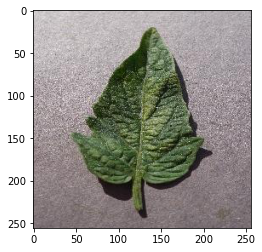

In [47]:
plt.imshow(copy)
print(CATEGORIES[jagga])